# EMG_D_TASK1 (XGBOOST)

In [66]:
#Import libraries:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import seaborn as sn

In [2]:
#load train data
X_train = np.load('data/train/X_train.npy')
y_train = np.load('data/train/Y_train.npy')

In [3]:
X_train

array([[-1.16309211, -0.3546237 , -0.74730777, ...,  0.28026013,
         0.49767227,  0.96432177],
       [ 2.31320049,  1.59572937,  1.97463785, ..., -0.40514213,
        -1.10036416, -1.23049214],
       [-2.07132407, -0.22232178,  0.03296851, ...,  0.33527047,
         0.74062767,  1.37486106],
       ...,
       [ 0.72306117, -0.72896021,  1.06176973, ...,  0.38946213,
        -0.02628944, -0.80144785],
       [ 0.4609857 ,  0.7564458 , -0.10651615, ...,  0.31656386,
        -0.14193841, -0.60099338],
       [-0.86468831,  0.0884742 , -0.56687049, ...,  0.40423565,
         0.16746287,  0.50399375]])

In [4]:
y_train

array([2, 7, 2, ..., 5, 3, 3], dtype=int64)

In [5]:
np.shape(X_train)

(28368, 42)

In [6]:
np.shape(y_train)

(28368,)

In [7]:
#load test data
#set1
X_test1 = np.load('data/test/set1/X_test.npy')
y_test1 = np.load('data/test/set1/Y_test.npy')

#set2
X_test2 = np.load('data/test/set2/X_test2.npy')
y_test2 = np.load('data/test/set2/Y_test2.npy')

In [8]:
X_test1

array([[-1.49323659, -1.31642816, -1.09727374, ...,  0.20969347,
        -1.17185383, -0.73984794],
       [ 0.88280664, -0.23407741,  0.09149077, ...,  0.40496777,
         0.59621983, -1.12519401],
       [ 0.39598404, -0.80282236,  1.31045093, ...,  0.37037071,
        -0.11712419,  0.37901192],
       ...,
       [-0.79349702, -0.76096   , -0.50744743, ...,  0.32366181,
         0.07643469, -0.75933433],
       [-1.43415616, -1.15663135, -1.43118689, ...,  0.16086258,
        -0.82059232, -0.15097011],
       [ 0.86502642,  1.4537528 ,  1.41061959, ..., -2.57317385,
        -1.50707939,  0.48405214]])

In [9]:
y_test1

array([0, 6, 5, ..., 2, 0, 7], dtype=int64)

In [10]:
X_test2

array([[-0.96552361, -0.99460393, -0.98299273, ...,  0.94084397,
         0.88986478,  0.2945621 ],
       [-0.9701099 , -0.96892845, -0.96945983, ...,  0.96643501,
         0.97059154,  0.56785259],
       [-0.96620952, -0.96951394, -0.97051092, ...,  0.89918706,
         0.64122961,  0.36103823],
       ...,
       [-0.97305436, -0.98765301, -0.98584242, ...,  0.95100397,
         0.90816262,  0.48809375],
       [-0.98641648, -0.97928227, -0.96988717, ...,  0.97807859,
         0.95645382,  0.71834548],
       [-0.96444105, -0.96537915, -0.96197033, ...,  0.19431033,
        -0.01050145, -0.01290869]])

In [11]:
y_test2

array([6, 1, 3, ..., 2, 2, 7], dtype=int64)

In [12]:
print(np.shape(X_test1))
print(np.shape(y_test1))
print(np.shape(X_test2))
print(np.shape(y_test2))

(12168, 42)
(12168,)
(7040, 42)
(7040,)


In [13]:
#scaling the data

In [14]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test1 = sc.fit_transform(X_test1)
X_test2 = sc.fit_transform(X_test2)

In [15]:
X_train

array([[-1.16309211, -0.3546237 , -0.74730777, ...,  0.28026013,
         0.49767227,  0.96432177],
       [ 2.31320049,  1.59572937,  1.97463785, ..., -0.40514213,
        -1.10036416, -1.23049214],
       [-2.07132407, -0.22232178,  0.03296851, ...,  0.33527047,
         0.74062767,  1.37486106],
       ...,
       [ 0.72306117, -0.72896021,  1.06176973, ...,  0.38946213,
        -0.02628944, -0.80144785],
       [ 0.4609857 ,  0.7564458 , -0.10651615, ...,  0.31656386,
        -0.14193841, -0.60099338],
       [-0.86468831,  0.0884742 , -0.56687049, ...,  0.40423565,
         0.16746287,  0.50399375]])

In [16]:
X_test1

array([[-1.49323659, -1.31642816, -1.09727374, ...,  0.20969347,
        -1.17185383, -0.73984794],
       [ 0.88280664, -0.23407741,  0.09149077, ...,  0.40496777,
         0.59621983, -1.12519401],
       [ 0.39598404, -0.80282236,  1.31045093, ...,  0.37037071,
        -0.11712419,  0.37901192],
       ...,
       [-0.79349702, -0.76096   , -0.50744743, ...,  0.32366181,
         0.07643469, -0.75933433],
       [-1.43415616, -1.15663135, -1.43118689, ...,  0.16086258,
        -0.82059232, -0.15097011],
       [ 0.86502642,  1.4537528 ,  1.41061959, ..., -2.57317385,
        -1.50707939,  0.48405214]])

In [17]:
X_test2

array([[ 0.4581313 , -1.31710185, -0.78210818, ...,  0.28155887,
         0.51730558, -0.74698434],
       [-0.09287822,  0.70185549,  0.56986185, ...,  0.39063752,
         0.79947043,  0.37151987],
       [ 0.3757245 ,  0.65581691,  0.46485571, ...,  0.10400144,
        -0.35175087, -0.47491549],
       ...,
       [-0.44663494, -0.77052572, -1.06679893, ...,  0.32486462,
         0.58126217,  0.04508846],
       [-2.05199837, -0.11230316,  0.52716971, ...,  0.44026687,
         0.75005478,  0.98744661],
       [ 0.58819328,  0.98095059,  1.31808173, ..., -2.90044887,
        -2.62975149, -2.00537926]])

In [18]:
#!pip install xgboost

In [18]:
# XGBoost model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test1)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.72%


In [19]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test2)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.68%


In [20]:
#1st model

In [21]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax', num_class = 8,
 nthread= 4,
 seed=10)

In [22]:
# fit model on training data
model = xgb1
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test1)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.20%


In [23]:
# make predictions for test data
y_pred2 = model.predict(X_test2)
predictions = [round(value) for value in y_pred2]

# evaluate predictions
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.12%


In [25]:
#param tuning #1

In [27]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, gamma=0, subsample=0.8,
                                                  colsample_bytree=0.8, objective= 'multi:softmax', num_class = 8, 
                                                  nthread=4, seed= 10),  param_grid = param_test1, 
                                                 scoring = 'accuracy',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

print("Best parameters set found on training set:")
print()
print(gsearch1.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'max_depth': 3, 'min_child_weight': 3}

Grid scores on training set:

0.99901 (+/-0.00065) for {'max_depth': 3, 'min_child_weight': 1}
0.99912 (+/-0.00074) for {'max_depth': 3, 'min_child_weight': 3}
0.99898 (+/-0.00061) for {'max_depth': 3, 'min_child_weight': 5}
0.99905 (+/-0.00069) for {'max_depth': 5, 'min_child_weight': 1}
0.99887 (+/-0.00091) for {'max_depth': 5, 'min_child_weight': 3}
0.99898 (+/-0.00065) for {'max_depth': 5, 'min_child_weight': 5}
0.99887 (+/-0.00091) for {'max_depth': 7, 'min_child_weight': 1}
0.99884 (+/-0.00091) for {'max_depth': 7, 'min_child_weight': 3}
0.99894 (+/-0.00086) for {'max_depth': 7, 'min_child_weight': 5}
0.99880 (+/-0.00098) for {'max_depth': 9, 'min_child_weight': 1}
0.99877 (+/-0.00086) for {'max_depth': 9, 'min_child_weight': 3}
0.99887 (+/-0.00091) for {'max_depth': 9, 'min_child_weight': 5}



In [28]:
param_test2 = {
 'max_depth':[3,4,5],
 'min_child_weight':[3,4,5]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(  learning_rate =0.1, n_estimators=200, gamma=0, subsample=0.8,
                                                  colsample_bytree=0.8, objective= 'multi:softmax', num_class = 8, 
                                                  nthread=4, seed=10),  param_grid = param_test2, 
                                                 scoring = 'accuracy',n_jobs=4, cv=5)
gsearch2.fit(X_train,y_train)

print("Best parameters set found on training set:")
print()
print(gsearch2.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'max_depth': 3, 'min_child_weight': 3}

Grid scores on training set:

0.99912 (+/-0.00074) for {'max_depth': 3, 'min_child_weight': 3}
0.99901 (+/-0.00061) for {'max_depth': 3, 'min_child_weight': 4}
0.99898 (+/-0.00061) for {'max_depth': 3, 'min_child_weight': 5}
0.99901 (+/-0.00065) for {'max_depth': 4, 'min_child_weight': 3}
0.99898 (+/-0.00078) for {'max_depth': 4, 'min_child_weight': 4}
0.99894 (+/-0.00092) for {'max_depth': 4, 'min_child_weight': 5}
0.99887 (+/-0.00091) for {'max_depth': 5, 'min_child_weight': 3}
0.99898 (+/-0.00068) for {'max_depth': 5, 'min_child_weight': 4}
0.99898 (+/-0.00065) for {'max_depth': 5, 'min_child_weight': 5}



In [30]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=3,
gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softmax', num_class = 8, nthread=4,seed=10), 
 param_grid = param_test2b, scoring='accuracy',n_jobs=4, cv=5)
gsearch2b.fit(X_train,y_train)

print("Best parameters set found on training set:")
print()
print(gsearch2b.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch2b.cv_results_['mean_test_score']
stds = gsearch2b.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2b.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'min_child_weight': 6}

Grid scores on training set:

0.99901 (+/-0.00082) for {'min_child_weight': 6}
0.99894 (+/-0.00077) for {'min_child_weight': 8}
0.99887 (+/-0.00073) for {'min_child_weight': 10}
0.99894 (+/-0.00059) for {'min_child_weight': 12}



In [32]:
# param tuning 2

In [33]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', num_class = 8, nthread=4,seed=10), 
 param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)

print("Best parameters set found on training set:")
print()
print(gsearch3.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch3.cv_results_['mean_test_score']
stds = gsearch3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch3.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'gamma': 0.0}

Grid scores on training set:

0.99912 (+/-0.00074) for {'gamma': 0.0}
0.99905 (+/-0.00065) for {'gamma': 0.1}
0.99901 (+/-0.00065) for {'gamma': 0.2}
0.99905 (+/-0.00065) for {'gamma': 0.3}
0.99905 (+/-0.00065) for {'gamma': 0.4}
0.99905 (+/-0.00065) for {'gamma': 0.5}
0.99894 (+/-0.00059) for {'gamma': 0.6}
0.99891 (+/-0.00079) for {'gamma': 0.7}
0.99884 (+/-0.00069) for {'gamma': 0.8}
0.99880 (+/-0.00068) for {'gamma': 0.9}



In [27]:
param_test3b = {
 'gamma':[i/100.0 for i in range(0,10,2)]
}
gsearch3b = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', num_class = 8, nthread=4,seed=10), 
 param_grid = param_test3b, scoring='accuracy',n_jobs=4, cv=5)
gsearch3b.fit(X_train,y_train)

print("Best parameters set found on training set:")
print()
print(gsearch3b.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch3b.cv_results_['mean_test_score']
stds = gsearch3b.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch3b.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'gamma': 0.0}

Grid scores on training set:

0.99912 (+/-0.00074) for {'gamma': 0.0}
0.99908 (+/-0.00072) for {'gamma': 0.02}
0.99905 (+/-0.00065) for {'gamma': 0.04}
0.99905 (+/-0.00065) for {'gamma': 0.06}
0.99901 (+/-0.00061) for {'gamma': 0.08}



In [24]:
#model2

In [25]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth= 3,
 min_child_weight= 3,
 gamma= 0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax', num_class = 8,
 nthread=4,
 seed=10)

In [26]:
# fit model on training data
model2 = xgb2
model2.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test1)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.20%


In [27]:
# make predictions for test data
y_pred2 = model2.predict(X_test2)
predictions = [round(value) for value in y_pred2]

# evaluate predictions
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.55%


In [29]:
param_test4 = {
 'subsample':[i/10.0 for i in range(5,10)],
 'colsample_bytree':[i/10.0 for i in range(5,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=3, gamma=0, objective= 'multi:softmax', num_class = 8 , nthread=4,seed=10), 
 param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)
gsearch4.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(gsearch4.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch4.cv_results_['mean_test_score']
stds = gsearch4.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch4.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'colsample_bytree': 0.6, 'subsample': 0.6}

Grid scores on training set:

0.99912 (+/-0.00074) for {'colsample_bytree': 0.5, 'subsample': 0.5}
0.99919 (+/-0.00048) for {'colsample_bytree': 0.5, 'subsample': 0.6}
0.99926 (+/-0.00041) for {'colsample_bytree': 0.5, 'subsample': 0.7}
0.99919 (+/-0.00048) for {'colsample_bytree': 0.5, 'subsample': 0.8}
0.99922 (+/-0.00036) for {'colsample_bytree': 0.5, 'subsample': 0.9}
0.99912 (+/-0.00050) for {'colsample_bytree': 0.6, 'subsample': 0.5}
0.99926 (+/-0.00035) for {'colsample_bytree': 0.6, 'subsample': 0.6}
0.99922 (+/-0.00065) for {'colsample_bytree': 0.6, 'subsample': 0.7}
0.99919 (+/-0.00061) for {'colsample_bytree': 0.6, 'subsample': 0.8}
0.99912 (+/-0.00039) for {'colsample_bytree': 0.6, 'subsample': 0.9}
0.99905 (+/-0.00036) for {'colsample_bytree': 0.7, 'subsample': 0.5}
0.99926 (+/-0.00035) for {'colsample_bytree': 0.7, 'subsample': 0.6}
0.99915 (+/-0.00079) for {'colsample_bytree': 0.7, 's

In [31]:
param_test5 = {
 'subsample':[i/100.0 for i in range(45,65,5)],
 'colsample_bytree':[i/100.0 for i in range(45,65,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
min_child_weight=3, gamma=0, objective= 'multi:softmax', num_class = 8 , nthread=4, seed=10), 
param_grid = param_test5, scoring='accuracy',n_jobs=4, cv=5)

gsearch5.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(gsearch5.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch5.cv_results_['mean_test_score']
stds = gsearch5.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch5.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'colsample_bytree': 0.6, 'subsample': 0.6}

Grid scores on training set:

0.999 (+/-0.001) for {'colsample_bytree': 0.45, 'subsample': 0.45}
0.999 (+/-0.001) for {'colsample_bytree': 0.45, 'subsample': 0.5}
0.999 (+/-0.000) for {'colsample_bytree': 0.45, 'subsample': 0.55}
0.999 (+/-0.001) for {'colsample_bytree': 0.45, 'subsample': 0.6}
0.999 (+/-0.001) for {'colsample_bytree': 0.5, 'subsample': 0.45}
0.999 (+/-0.001) for {'colsample_bytree': 0.5, 'subsample': 0.5}
0.999 (+/-0.000) for {'colsample_bytree': 0.5, 'subsample': 0.55}
0.999 (+/-0.000) for {'colsample_bytree': 0.5, 'subsample': 0.6}
0.999 (+/-0.000) for {'colsample_bytree': 0.55, 'subsample': 0.45}
0.999 (+/-0.001) for {'colsample_bytree': 0.55, 'subsample': 0.5}
0.999 (+/-0.001) for {'colsample_bytree': 0.55, 'subsample': 0.55}
0.999 (+/-0.000) for {'colsample_bytree': 0.55, 'subsample': 0.6}
0.999 (+/-0.000) for {'colsample_bytree': 0.6, 'subsample': 0.45}
0.999 (+/-0.000) for 

In [42]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,_child_weight=3, gamma=0, subsample=0.6, colsample_bytree=0.6,objective= 'multi:softmax', num_class = 8,
                                                  nthread=4, seed=10), 
 param_grid = param_test6, scoring='accuracy',n_jobs=4, cv=5)

gsearch6.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(gsearch6.best_params_)
print()
print("Grid scores on training set:")
print()
means = gsearch6.cv_results_['mean_test_score']
stds = gsearch6.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch6.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r"
            % (mean, std * 2, params))
print()

[20:19:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters set found on training set:

{'reg_alpha': 1e-05}

Grid scores on training set:

0.99926 (+/-0.00035) for {'reg_alpha': 1e-05}
0.99915 (+/-0.00068) for {'reg_alpha': 0.01}
0.99919 (+/-0.00048) for {'reg_alpha': 0.1}
0.99901 (+/-0.00048) for {'reg_alpha': 1}
0.99792 (+/-0.00129) for {'reg_alpha': 10}
0.98163 (+/-0.00426) for {'reg_alpha': 100}



In [28]:
#model 3

In [29]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.6,
 reg_alpha= 1e-05,
 objective= 'multi:softmax', num_class = 8,
 nthread=4,
 seed=10)

In [30]:
# fit model on training data
model3 = xgb3

model3.fit(X_train, y_train)

# make predictions for test data
y_pred = model3.predict(X_test1)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.23%


In [31]:
# make predictions for test data
y_pred2 = model3.predict(X_test2)
predictions = [round(value) for value in y_pred2]

# evaluate predictions
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.68%


In [32]:
#learning rate and n_estimators

In [ ]:
#param_test7 = {
#'n_estimators' : [100, 200, 500, 1000, 5000],
#'learning_rate':[0.0001, 0.001, 0.01, 0.1]
#}
#gsearch7 = GridSearchCV(estimator = XGBClassifier( max_depth=3,min_child_weight=3, gamma=0, subsample=0.6, #colsample_bytree=0.6,objective= 'multi:softmax', num_class = 8, nthread=4, seed=10),param_grid = param_test7, #scoring='accuracy',n_jobs=4, cv=5)
#gsearch7.fit(X_train, y_train)
#print("Best parameters set found on training set:")
#print()
#print(gsearch7.best_params_)
#print()
#print("Grid scores on training set:")
#print()
#means = gsearch7.cv_results_['mean_test_score']
#stds = gsearch7.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, gsearch7.cv_results_['params']):
    #print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
#print()

In [58]:
#model 4

In [59]:
xgb4 = XGBClassifier(
 learning_rate = 0.1,
 n_estimators = 5000,
 max_depth = 3,
 min_child_weight = 3,
 gamma = 0,
 subsample = 0.6,
 colsample_bytree = 0.6,
 reg_alpha = 1e-05,
 objective = 'multi:softmax', num_class = 8,
 nthread = 4,
 seed = 10)

In [60]:
# fit model on training data
model4 = xgb4
model4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, nthread=4, num_class=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=10,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=None, seed=10,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [61]:
# make predictions for test data
y_predict1 = model4.predict(X_test1)
predictions = [round(value) for value in y_predict1]

# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.30%


In [62]:
# make predictions for test data
y_predict2 = model4.predict(X_test2)
predictions = [round(value) for value in y_predict2]

# evaluate predictions
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.66%


In [ ]:
#RESULTS

In [ ]:
#TEST SET 1

In [63]:
#accuracy
accuracy_score(y_test1, y_predict1)

0.9330210387902695

In [64]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test1, y_predict1, digits = 8))

              precision    recall  f1-score   support

           0  0.90751790 1.00000000 0.95151705      1521
           1  0.99217221 1.00000000 0.99607073      1521
           2  0.98700455 0.99868508 0.99281046      1521
           3  0.99647577 0.74358974 0.85165663      1521
           4  1.00000000 0.99211045 0.99603960      1521
           5  0.75704225 0.98948060 0.85779424      1521
           6  0.88871350 0.74030243 0.80774749      1521
           7  1.00000000 1.00000000 1.00000000      1521

    accuracy                      0.93302104     12168
   macro avg  0.94111577 0.93302104 0.93170452     12168
weighted avg  0.94111577 0.93302104 0.93170452     12168



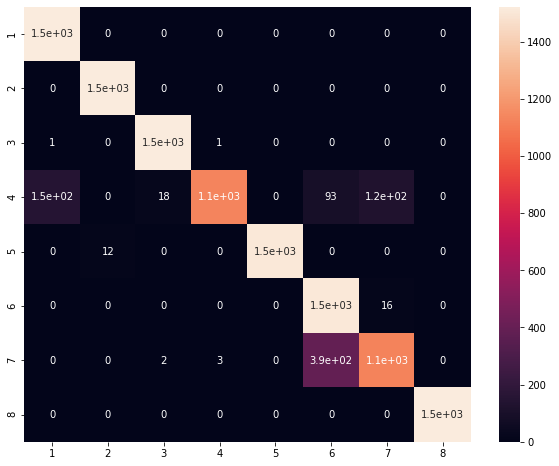

In [67]:
from sklearn.metrics import confusion_matrix
    
#confusion matrix   
cm_svm = confusion_matrix(y_test1, y_predict1)
array = cm_svm 

df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [68]:
#number of correctly classified samples in the test set
accuracy_score(y_test1, y_predict1, normalize=False)

11353

In [69]:
#precision vs recall curve

In [70]:
y_score1 = model4.predict_proba(X_test1)

In [72]:
no_of_classes = 8
y_test_bin1 = label_binarize(y_test1, classes=[*range(no_of_classes)])

range(0, 8)


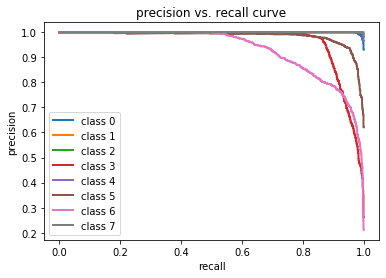

In [73]:
precision = dict()
recall = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin1[:,i],y_score1[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [74]:
#roc_curve

range(0, 8)


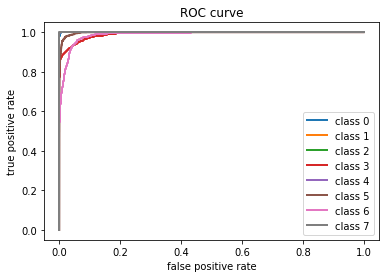

In [75]:
fpr = dict()
tpr = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin1[:, i],y_score1[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [76]:
#TEST SET 2

In [77]:
#accuracy
accuracy_score(y_test2, y_predict2)

0.9666193181818182

In [78]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test2, y_predict2, digits = 8))

              precision    recall  f1-score   support

           0  0.94764957 1.00000000 0.97312123       887
           1  0.98991031 1.00000000 0.99492958       883
           2  0.98858447 0.98633257 0.98745724       878
           3  0.98883375 0.89651294 0.94041298       889
           4  1.00000000 0.98765432 0.99378882       891
           5  0.86739781 0.99656357 0.92750533       873
           6  0.97197452 0.86704545 0.91651652       880
           7  0.99651972 1.00000000 0.99825683       859

    accuracy                      0.96661932      7040
   macro avg  0.96885877 0.96676361 0.96649857      7040
weighted avg  0.96893362 0.96661932 0.96646464      7040



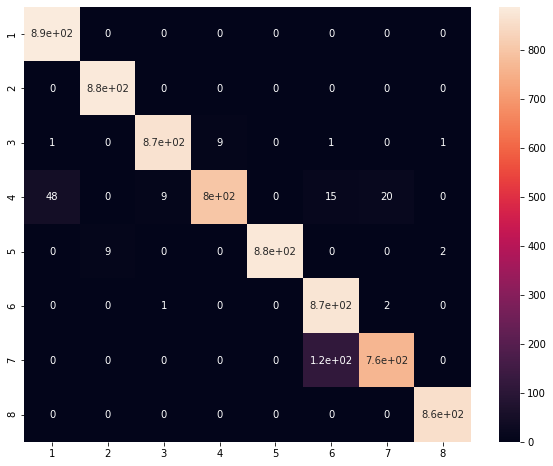

In [79]:
from sklearn.metrics import confusion_matrix
    
#confusion matrix   
cm_svm = confusion_matrix(y_test2, y_predict2)
array = cm_svm 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [80]:
#number of correctly classified samples in the test set
accuracy_score(y_test2, y_predict2, normalize=False)

6805

In [81]:
#precision vs recall curve

In [82]:
y_score2 = model4.predict_proba(X_test2)

In [83]:
y_test_bin2 = label_binarize(y_test2, classes=[*range(no_of_classes)])

range(0, 8)


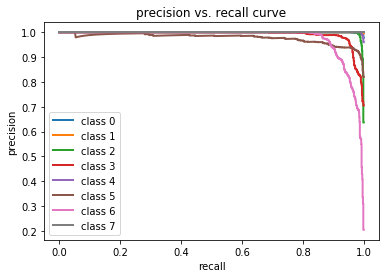

In [84]:
precision = dict()
recall = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin2[:,i],y_score2[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [85]:
#roc_curve

range(0, 8)


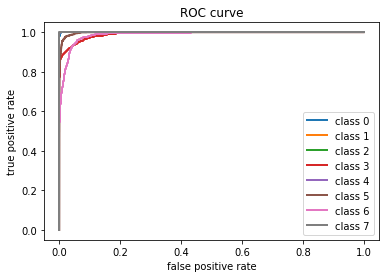

In [86]:
fpr = dict()
tpr = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin1[:, i],y_score1[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

---